In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('COVID-19 Data for Project.xlsx')
df = df.drop(0) # remove blank row
len(df)

1000

In [2]:
df1 = df.copy()
df1.drop(df1.loc[df1['AGE']=='-'].index, inplace=True) # drop rows with no specified age
df1['AGE'].max()
len(df1)

999

(array([ 13.,  29., 273., 202., 155., 164., 110.,  37.,  15.,   0.,   1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110]),
 <BarContainer object of 11 artists>)

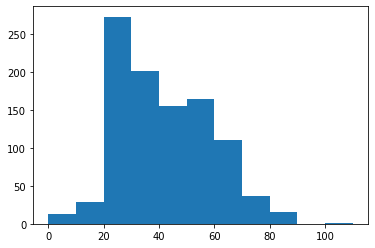

In [3]:
import matplotlib.pyplot as plt
plt.hist(df1['AGE'], bins=[0,10,20,30,40,50,60,70,80,90,100,110])

In [4]:
df1['AGE'].mean()

41.029029029029026

In [5]:
df2 = df.copy()
df2.drop(df2.loc[df2['RECOVERED ON']=='-'].index, inplace=True) # drop rows with no recovery date

# find number of days taken to recover
df2['CONFIRMED ON'] = pd.to_datetime(df2['CONFIRMED ON'])
df2['RECOVERED ON'] = pd.to_datetime(df2['RECOVERED ON'])
df2['days to recover'] = df2['RECOVERED ON'] - df2['CONFIRMED ON']
df2['days to recover'] = df2['days to recover'].dt.days

# average days to recover by gender
df2[['GENDER', 'days to recover']].groupby(['GENDER']).mean()

,days to recover
GENDER,
Female,15.985507
Male,16.375635


In [6]:
df2['GENDER'].value_counts


Male      394
Female    276
Name: GENDER, dtype: int64